In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.core.display import SVG

# Mechanical advantage

In the diagram below, there is a 50-N force, $F$, applied downwards on a
constrained linkage system. There is a restoring force, $R$, that
maintains a slow change in the angle of the mechanism, $\theta$, as it
changes from $89^o$ to $-89^o$. Your
goal is to determine the necessary restoring force $R$ as a
function of angle $\theta$. 

![two-bar linkage sliding on surface](./images/two-bar.svg)


## Kinematics - geometry of motion

This system has two rigid bodies connected at point $A$ by a pin and the
whole system is pinned to the ground at $O$. Point $B$ slides
along a horizontal surface. The total degrees of freedom are

3 (link 1) + 3 (link 2) - 2 constraints ($O$) - 2 constraints ($A$) - 1
constraint ($B$) - 1 constraint ($\theta$-fixed) = __0 DOF__

For a given angle $\theta$, there can only be one configuration in the
system. Create the constraint equations using the relative position of
point $A$ as such

$\mathbf{r}_A =  \mathbf{r}_{A/B} + \mathbf{r}_B$

![two-bar constraint diagram](./images/two-bar_constraints.svg)

where 

$\mathbf{r}_A = L(\cos\theta \hat{i}+ \sin\theta \hat{j})$

$\mathbf{r}_B = d\hat{i}$

$\mathbf{r}_{A/B} = L(-\cos\theta \hat{i} + \sin\theta \hat{j})$

solving for the $\hat{i}-$ and $\hat{j}-$components creates two
equations that describe the state of the system

* $\theta = \theta$ which states because we have an isosceles triangle,
two angles have to be equal
* $d = 2 L \cos\theta$ so $\mathbf{r}_{B} = 2L \cos\theta \hat{i}$

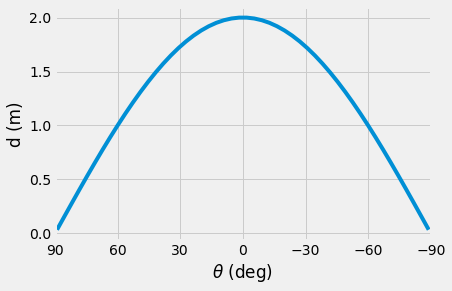

In [2]:
theta = np.linspace(89,-89)*np.pi/180
d = 2*1*np.cos(theta)
plt.plot(theta*180/np.pi, d)
plt.xticks(np.arange(-90,91,30))
plt.xlabel(r'$\theta$ (deg)')
plt.xlim(90,-90)
plt.ylabel('d (m)');

## Kinetics - applied forces and constraint forces

The applied force, $F=50~N$ is constant, but $R$ is dependent upon the
geometry of the system. You solved for the kinematics in the first part,
here you can use the Newton-Euler equations to solve for $R$ given $\theta$ and
$F$. Separate the system into the left and right links,

![two-bar FBD Newton-Euler equations](./images/two-bar_FBD.svg)

The Newton-Euler equations:

* $\mathbf{F} = m\mathbf{a} = \mathbf{0}$ links moving slowly
* $M_G = I\alpha = 0$ links rotating slowly

Newton-Euler equations for the left bar:

1. $\mathbf{F}\cdot \hat{i} = N_{x1}+N_{x2} = 0$
2. $\mathbf{F}\cdot \hat{i} = N_{y1}+N_{y2} - F = 0$
3. $M_O = l\hat{b}_1 \times (-F\hat{j} + N_{x2}\hat{i} + N_{y2}\hat{j})
= 0$

Newton-Euler equations for the right bar:

1. $\mathbf{F}\cdot \hat{i} = -N_{x2}-R = 0$
2. $\mathbf{F}\cdot \hat{i} = -N_{y2}+N_{y3} = 0$
3. $M_A = l\hat{c}_1 \times (-R\hat{i} + N_{y3}\hat{j})= 0$

> __Note:__ Don't count $F$ twice! You can use the applied force on the
> left or right, but not both. Try solving the equations placing it on
> the right bar. 

The four equations for $\mathbf{F}$ relate the reaction forces
$\mathbf{N}_{1},~\mathbf{N}_{2},~and~\mathbf{N}_{3}$. The two moment
equations relate $R$ to $F$ and $\theta$ as such

$N_{y2}L\cos\theta - RL\sin\theta = 0$

and

$-FL\cos\theta +N_{y2}\cos\theta+RL\sin\theta = 0$

combining there results

$F\cos\theta = 2R\sin\theta\rightarrow R = \frac{F}{2}\cot\theta$

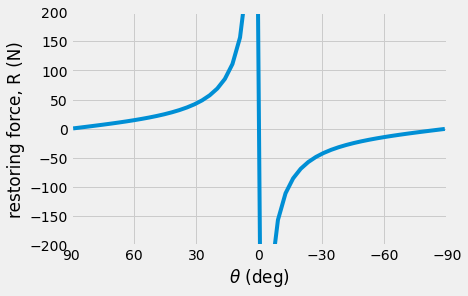

In [3]:
R = 50/2*np.tan(theta)**-1
plt.plot(theta*180/np.pi, R)
plt.xticks(np.arange(-90,91,30))
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('restoring force, R (N)')
plt.xlim(90,-90)
plt.ylim(-200,200);

## Wrapping up

Take a look at the mechanical advantage and disadvantage this system can create. For angles close to $\theta\approx 90^o$, the restoring force is close to zero. In this case, the applied force is mostly directed at constraints on the system. When the angles are close to $\theta \approx 0^o$, the required restoring force can be $>100\times$ the input force. 

Have you seen this type of linkage system in engineering devices?